In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def hash_prompt(sentence):
  hash = 0
  for word in sentence:
    for c in word:
      hash = ord(c) + (hash << 2) - 3*hash
  return hash

In [4]:
def hash_token(token):
  hash = 0
  for c in token:
    hash = ord(c) + (hash << 2) - 3*hash
  return hash

In [7]:
train = pd.read_csv('TransformedData/fr.csv', low_memory = False)

In [8]:
train.tail(5)

,prompt,user,countries,days,session,format,time,token_1,pos_1,morf_1,case_1,gender_1,number_1,person_1,tense_1,pronType_1,token_2,pos_2,morf_2,case_2,gender_2,number_2,person_2,tense_2,pronType_2,token_3,pos_3,morf_3,case_3,gender_3,number_3,person_3,tense_3,pronType_3,token_4,pos_4,morf_4,case_4,gender_4,number_4,person_4,tense_4,pronType_4,token_5,pos_5,morf_5,case_5,gender_5,number_5,person_5,tense_5,pronType_5,token_6,pos_6,morf_6,case_6,gender_6,number_6,person_6,tense_6,pronType_6,token_7,pos_7,morf_7,case_7,gender_7,number_7,person_7,tense_7,pronType_7,token_8,pos_8,morf_8,case_8,gender_8,number_8,person_8,tense_8,pronType_8,token_9,pos_9,morf_9,case_9,gender_9,number_9,person_9,tense_9,pronType_9,token_10,pos_10,morf_10,case_10,gender_10,number_10,person_10,tense_10,pronType_10,token_11,pos_11,morf_11,case_11,gender_11,number_11,person_11,tense_11,pronType_11,token_12,pos_12,morf_12,case_12,gender_12,number_12,person_12,tense_12,pronType_12,acc_sum
55068,The book is serious.,MqlBu0OO,DK,8.205,lesson,reverse_translate,11.0,Le,DET,det,NaN,Masc,Sing,NaN,NaN,NaN,livre,NOUN,nsubj,NaN,Masc,Sing,NaN,NaN,NaN,est,VERB,cop,NaN,NaN,Sing,3.0,Pres,NaN,sérieux,ADJ,ROOT,NaN,Masc,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
55069,I am German.,MqlBu0OO,DK,8.205,lesson,reverse_translate,7.0,Je,PRON,nsubj,NaN,NaN,Sing,1.0,NaN,NaN,suis,VERB,cop,NaN,NaN,Sing,1.0,Pres,NaN,allemande,ADJ,ROOT,NaN,Fem,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
55070,,MqlBu0OO,DK,8.208,lesson,listen,18.0,Mon,DET,nmod:poss,NaN,Masc,Sing,NaN,NaN,NaN,enfant,NOUN,nsubj,NaN,Masc,Sing,NaN,NaN,NaN,est,VERB,cop,NaN,NaN,Sing,3.0,Pres,NaN,jolie,ADJ,ROOT,NaN,Fem,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
55071,The dog is pretty.,MqlBu0OO,DK,8.208,lesson,reverse_translate,10.0,Le,DET,det,NaN,Masc,Sing,NaN,NaN,NaN,chien,NOUN,nsubj,NaN,Masc,Sing,NaN,NaN,NaN,est,VERB,cop,NaN,NaN,Sing,3.0,Pres,NaN,mignon,ADJ,ROOT,NaN,Masc,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
55072,The dog is dirty.,MqlBu0OO,DK,8.208,lesson,reverse_translate,10.0,La,DET,det,NaN,Fem,Sing,NaN,NaN,NaN,chienne,NOUN,nsubj,NaN,Fem,Sing,NaN,NaN,NaN,est,VERB,cop,NaN,NaN,Sing,3.0,Pres,NaN,sale,ADJ,ROOT,NaN,Fem,Sing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
train = train.replace({np.nan: '0'})
train['acc_sum'] = train['acc_sum'].astype(int)

#hashing
train['prompt'] = train['prompt'].apply(hash_prompt)
train['user'] = train['user'].apply(hash_token)
train['countries'] = train['countries'].apply(hash_token)
train['session'] = train['session'].apply(hash_token)
train['format'] = train['format'].apply(hash_token)

train['token_1'] = train['token_1'].apply(hash_token)
train['token_2'] = train['token_2'].apply(hash_token)
train['token_3'] = train['token_3'].apply(hash_token)
train['token_4'] = train['token_4'].apply(hash_token)
train['token_5'] = train['token_5'].apply(hash_token)
train['token_6'] = train['token_6'].apply(hash_token)
train['token_7'] = train['token_7'].apply(hash_token)
train['token_8'] = train['token_8'].apply(hash_token)
train['token_9'] = train['token_9'].apply(hash_token)
train['token_10'] = train['token_10'].apply(hash_token)
train['token_11'] = train['token_11'].apply(hash_token)
train['token_12'] = train['token_12'].apply(hash_token)

train['morf_1'] = train['morf_1'].apply(hash_token)
train['morf_2'] = train['morf_2'].apply(hash_token)
train['morf_3'] = train['morf_3'].apply(hash_token)
train['morf_4'] = train['morf_4'].apply(hash_token)
train['morf_5'] = train['morf_5'].apply(hash_token)
train['morf_6'] = train['morf_6'].apply(hash_token)
train['morf_7'] = train['morf_7'].apply(hash_token)
train['morf_8'] = train['morf_8'].apply(hash_token)
train['morf_9'] = train['morf_9'].apply(hash_token)
train['morf_10'] = train['morf_10'].apply(hash_token)
train['morf_11'] = train['morf_11'].apply(hash_token)
train['morf_12'] = train['morf_12'].apply(hash_token)

train['pos_1'] = train['pos_1'].apply(hash_token)
train['pos_2'] = train['pos_2'].apply(hash_token)
train['pos_3'] = train['pos_3'].apply(hash_token)
train['pos_4'] = train['pos_4'].apply(hash_token)
train['pos_5'] = train['pos_5'].apply(hash_token)
train['pos_6'] = train['pos_6'].apply(hash_token)
train['pos_7'] = train['pos_7'].apply(hash_token)
train['pos_8'] = train['pos_8'].apply(hash_token)
train['pos_9'] = train['pos_9'].apply(hash_token)
train['pos_10'] = train['pos_10'].apply(hash_token)
train['pos_11'] = train['pos_11'].apply(hash_token)
train['pos_12'] = train['pos_12'].apply(hash_token)

train['case_1'] = train['case_1'].apply(hash_token)
train['case_2'] = train['case_2'].apply(hash_token)
train['case_3'] = train['case_3'].apply(hash_token)
train['case_4'] = train['case_4'].apply(hash_token)
train['case_5'] = train['case_5'].apply(hash_token)
train['case_6'] = train['case_6'].apply(hash_token)
train['case_7'] = train['case_7'].apply(hash_token)
train['case_8'] = train['case_8'].apply(hash_token)
train['case_9'] = train['case_9'].apply(hash_token)
train['case_10'] = train['case_10'].apply(hash_token)
train['case_11'] = train['case_11'].apply(hash_token)
train['case_12'] = train['case_12'].apply(hash_token)

train['gender_1'] = train['gender_1'].apply(hash_token)
train['gender_2'] = train['gender_2'].apply(hash_token)
train['gender_3'] = train['gender_3'].apply(hash_token)
train['gender_4'] = train['gender_4'].apply(hash_token)
train['gender_5'] = train['gender_5'].apply(hash_token)
train['gender_6'] = train['gender_6'].apply(hash_token)
train['gender_7'] = train['gender_7'].apply(hash_token)
train['gender_8'] = train['gender_8'].apply(hash_token)
train['gender_9'] = train['gender_9'].apply(hash_token)
train['gender_10'] = train['gender_10'].apply(hash_token)
train['gender_11'] = train['gender_11'].apply(hash_token)
train['gender_12'] = train['gender_12'].apply(hash_token)

train['tense_1'] = train['tense_1'].apply(hash_token)
train['tense_2'] = train['tense_2'].apply(hash_token)
train['tense_3'] = train['tense_3'].apply(hash_token)
train['tense_4'] = train['tense_4'].apply(hash_token)
train['tense_5'] = train['tense_5'].apply(hash_token)
train['tense_6'] = train['tense_6'].apply(hash_token)
train['tense_7'] = train['tense_7'].apply(hash_token)
train['tense_8'] = train['tense_8'].apply(hash_token)
train['tense_9'] = train['tense_9'].apply(hash_token)
train['tense_10'] = train['tense_10'].apply(hash_token)
train['tense_11'] = train['tense_11'].apply(hash_token)
train['tense_12'] = train['tense_12'].apply(hash_token)

train['pronType_1'] = train['pronType_1'].apply(hash_token)
train['pronType_2'] = train['pronType_2'].apply(hash_token)
train['pronType_3'] = train['pronType_3'].apply(hash_token)
train['pronType_4'] = train['pronType_4'].apply(hash_token)
train['pronType_5'] = train['pronType_5'].apply(hash_token)
train['pronType_6'] = train['pronType_6'].apply(hash_token)
train['pronType_7'] = train['pronType_7'].apply(hash_token)
train['pronType_8'] = train['pronType_8'].apply(hash_token)
train['pronType_9'] = train['pronType_9'].apply(hash_token)
train['pronType_10'] = train['pronType_10'].apply(hash_token)
train['pronType_11'] = train['pronType_11'].apply(hash_token)
train['pronType_12'] = train['pronType_12'].apply(hash_token)

train['number_1'] = train['number_1'].apply(hash_token)
train['number_2'] = train['number_2'].apply(hash_token)
train['number_3'] = train['number_3'].apply(hash_token)
train['number_4'] = train['number_4'].apply(hash_token)
train['number_5'] = train['number_5'].apply(hash_token)
train['number_6'] = train['number_6'].apply(hash_token)
train['number_7'] = train['number_7'].apply(hash_token)
train['number_8'] = train['number_8'].apply(hash_token)
train['number_9'] = train['number_9'].apply(hash_token)
train['number_10'] = train['number_10'].apply(hash_token)
train['number_11'] = train['number_11'].apply(hash_token)
train['number_12'] = train['number_12'].apply(hash_token)

train.head(5)

,prompt,user,countries,days,session,format,time,token_1,pos_1,morf_1,case_1,gender_1,number_1,person_1,tense_1,pronType_1,token_2,pos_2,morf_2,case_2,gender_2,number_2,person_2,tense_2,pronType_2,token_3,pos_3,morf_3,case_3,gender_3,number_3,person_3,tense_3,pronType_3,token_4,pos_4,morf_4,case_4,gender_4,number_4,person_4,tense_4,pronType_4,token_5,pos_5,morf_5,case_5,gender_5,number_5,person_5,tense_5,pronType_5,token_6,pos_6,morf_6,case_6,gender_6,number_6,person_6,tense_6,pronType_6,token_7,pos_7,morf_7,case_7,gender_7,number_7,person_7,tense_7,pronType_7,token_8,pos_8,morf_8,case_8,gender_8,number_8,person_8,tense_8,pronType_8,token_9,pos_9,morf_9,case_9,gender_9,number_9,person_9,tense_9,pronType_9,token_10,pos_10,morf_10,case_10,gender_10,number_10,person_10,tense_10,pronType_10,token_11,pos_11,morf_11,case_11,gender_11,number_11,person_11,tense_11,pronType_11,token_12,pos_12,morf_12,case_12,gender_12,number_12,person_12,tense_12,pronType_12,acc_sum
0,651,714,132,0.005,660,1833,14.0,177,221,317,48,388,401,0,48,48,766,320,324,48,388,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
1,1064,714,132,0.005,660,1833,14.0,175,319,546,48,48,401,1.0,48,48,452,303,322,48,48,401,1.0,410,48,328,221,317,48,280,401,0,48,278,522,320,324,48,280,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
2,751,714,132,0.005,660,1833,11.0,173,221,317,48,280,401,0,48,48,524,320,324,48,280,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
3,848,714,132,0.005,660,1833,10.0,175,319,546,48,48,401,1.0,48,48,452,303,322,48,48,401,1.0,410,48,227,221,317,48,388,401,0,48,278,766,320,324,48,388,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0
4,798,714,132,0.009,660,1833,8.0,175,319,546,48,48,401,1.0,48,48,452,303,322,48,48,401,1.0,410,48,523,207,324,48,280,401,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,0,48,48,0


In [10]:
from sklearn.preprocessing import minmax_scale

In [11]:
scaler = minmax_scale

In [12]:
scaled = train
cols_to_scale = ['days', 'time', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7',
                 'person_8', 'person_9', 'person_10', 'person_11', 'person_12'
                 ]
scaled[cols_to_scale] = scaler(train[cols_to_scale])
scaled.head(5)

,prompt,user,countries,days,session,format,time,token_1,pos_1,morf_1,case_1,gender_1,number_1,person_1,tense_1,pronType_1,token_2,pos_2,morf_2,case_2,gender_2,number_2,person_2,tense_2,pronType_2,token_3,pos_3,morf_3,case_3,gender_3,number_3,person_3,tense_3,pronType_3,token_4,pos_4,morf_4,case_4,gender_4,number_4,person_4,tense_4,pronType_4,token_5,pos_5,morf_5,case_5,gender_5,number_5,person_5,tense_5,pronType_5,token_6,pos_6,morf_6,case_6,gender_6,number_6,person_6,tense_6,pronType_6,token_7,pos_7,morf_7,case_7,gender_7,number_7,person_7,tense_7,pronType_7,token_8,pos_8,morf_8,case_8,gender_8,number_8,person_8,tense_8,pronType_8,token_9,pos_9,morf_9,case_9,gender_9,number_9,person_9,tense_9,pronType_9,token_10,pos_10,morf_10,case_10,gender_10,number_10,person_10,tense_10,pronType_10,token_11,pos_11,morf_11,case_11,gender_11,number_11,person_11,tense_11,pronType_11,token_12,pos_12,morf_12,case_12,gender_12,number_12,person_12,tense_12,pronType_12,acc_sum
0,651,714,132,0.000159,660,1833,0.000169,177,221,317,48,388,401,0.000000,48,48,766,320,324,48,388,401,0.000000,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
1,1064,714,132,0.000159,660,1833,0.000169,175,319,546,48,48,401,0.333333,48,48,452,303,322,48,48,401,0.333333,410,48,328,221,317,48,280,401,0.0,48,278,522,320,324,48,280,401,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
2,751,714,132,0.000159,660,1833,0.000133,173,221,317,48,280,401,0.000000,48,48,524,320,324,48,280,401,0.000000,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
3,848,714,132,0.000159,660,1833,0.000121,175,319,546,48,48,401,0.333333,48,48,452,303,322,48,48,401,0.333333,410,48,227,221,317,48,388,401,0.0,48,278,766,320,324,48,388,401,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0
4,798,714,132,0.000319,660,1833,0.000097,175,319,546,48,48,401,0.333333,48,48,452,303,322,48,48,401,0.333333,410,48,523,207,324,48,280,401,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,48,48,48,48,48,48,0.0,48,48,0


Resampling

In [13]:
X = train.drop('acc_sum', axis = 1)
y = train['acc_sum'].astype(int)

In [14]:
print('Total values:', train.shape[0])
print('Classes:')
print(y.value_counts())
y.value_counts(normalize = True) *100

Total values: 55073
Classes:
acc_sum
0    37543
1    17530
Name: count, dtype: int64


acc_sum
0    68.16952
1    31.83048
Name: proportion, dtype: float64

In [15]:
X_scaled = scaled.drop('acc_sum', axis = 1)
y_scaled = scaled['acc_sum'].astype(int)

In [16]:
print('Total values:', scaled.shape[0])
print('Classes:')
print(y_scaled.value_counts())
y_scaled.value_counts(normalize = True) *100

Total values: 55073
Classes:
acc_sum
0    37543
1    17530
Name: count, dtype: int64


acc_sum
0    68.16952
1    31.83048
Name: proportion, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.20,
                                                    random_state = 24)

In [19]:
print('Total values:', X_train.shape[0])
print('Classes:')
print(y_train.value_counts())
y_train.value_counts(normalize = True) *100

Total values: 44058
Classes:
acc_sum
0    30085
1    13973
Name: count, dtype: int64


acc_sum
0    68.284988
1    31.715012
Name: proportion, dtype: float64

<Axes: title={'center': 'French-English training dataset'}, xlabel='acc_sum'>

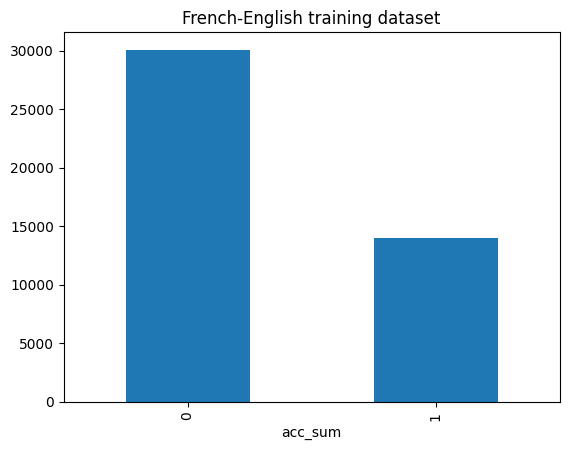

In [20]:
y_train.value_counts().plot(kind = 'bar', title = 'French-English training dataset')

In [21]:
print('Total values:', X_test.shape[0])
print('Classes:')
y_test.value_counts()

Total values: 11015
Classes:


acc_sum
0    7458
1    3557
Name: count, dtype: int64

In [22]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled,
                                                    y_scaled, test_size = 0.20,
                                                    random_state = 24)

In [23]:
print('Total values:', Xs_train.shape[0])
print('Classes:')
ys_train.value_counts()

Total values: 44058
Classes:


acc_sum
0    30085
1    13973
Name: count, dtype: int64

In [24]:
print('Total values:', Xs_test.shape[0])
print('Classes:')
ys_test.value_counts()

Total values: 11015
Classes:


acc_sum
0    7458
1    3557
Name: count, dtype: int64

In [25]:
!pip install imblearn

Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros = RandomOverSampler(sampling_strategy = "not majority")

In [28]:
X_over, y_over = ros.fit_resample(X_train, y_train)

In [29]:
print('Total values:', X_over.shape[0])
print('Classes:')
y_over.value_counts()

Total values: 60170
Classes:


acc_sum
0    30085
1    30085
Name: count, dtype: int64

<Axes: title={'center': 'Oversampled training fr-en dataset'}, xlabel='acc_sum'>

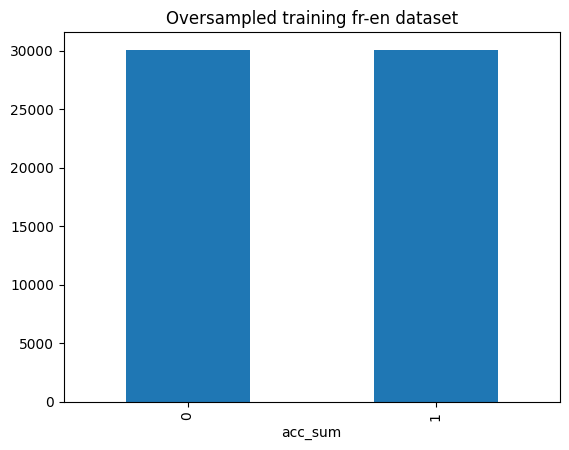

In [30]:
y_over.value_counts().plot(kind = 'bar', title = 'Oversampled training fr-en dataset')

In [31]:
Xs_over, ys_over = ros.fit_resample(Xs_train, ys_train)
print('Total values:', Xs_over.shape[0])
print('Classes:')
ys_over.value_counts()

Total values: 60170
Classes:


acc_sum
0    30085
1    30085
Name: count, dtype: int64

Undersampling

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [33]:
rus = RandomUnderSampler(sampling_strategy = "not minority")

In [34]:
X_under, y_under = rus.fit_resample(X_train, y_train)

In [35]:
print('Total values:', X_under.shape[0])
print('Classes:')
y_under.value_counts()

Total values: 27946
Classes:


acc_sum
0    13973
1    13973
Name: count, dtype: int64

<Axes: title={'center': 'Undersampled training fr-en dataset'}, xlabel='acc_sum'>

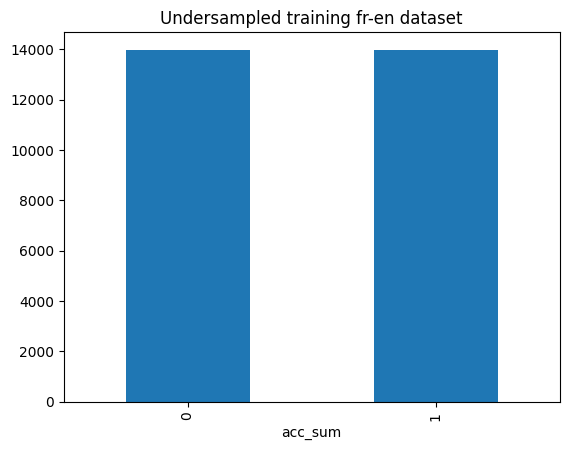

In [36]:
y_under.value_counts().plot(kind = 'bar', title = 'Undersampled training fr-en dataset')

In [37]:
Xs_under, ys_under = rus.fit_resample(Xs_train, ys_train)
print('Total values:', Xs_under.shape[0])
print('Classes:')
ys_under.value_counts()

Total values: 27946
Classes:


acc_sum
0    13973
1    13973
Name: count, dtype: int64

Decision Tree model - oversampled dataset

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [39]:
parameter = {
    'criterion' :['entropy', 'gini', 'log_loss'],
    'max_depth':[30, 40, 50, 60],
    'max_features':['sqrt', 'log2'],
    'min_samples_split':[10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

model = DecisionTreeClassifier()
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(model, param_distributions = parameter, n_iter = 50)

In [40]:
cv.fit(X_over, y_over)
cv.score(X_over, y_over)
cv.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 40,
 'criterion': 'entropy'}

In [41]:
dt_o = DecisionTreeClassifier(criterion = 'entropy',
                                 max_depth = 40,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 10,
                                 min_samples_split = 20
                                 )

In [42]:
dt_o.fit(X_over, y_over)

DecisionTreeClassifier(criterion='entropy', max_depth=40, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=20)

In [43]:
y_o_dt = dt_o.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_o_dt))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      7458
           1       0.50      0.63      0.56      3557

    accuracy                           0.68     11015
   macro avg       0.65      0.66      0.65     11015
weighted avg       0.70      0.68      0.69     11015



In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [47]:
y_prob_o = dt_o.predict_proba(X_test)[:, 1]

In [48]:
roc_auc_score(y_test, y_prob_o)

0.7262293998674463

In [49]:
fpr_o, tpr_o, _ = roc_curve(y_test,  y_prob_o)

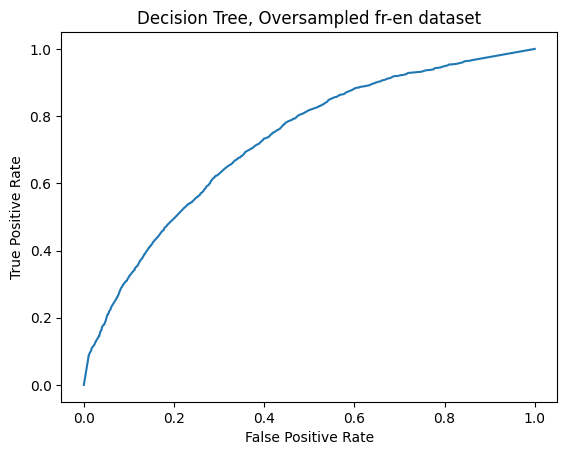

In [50]:
plt.plot(fpr_o, tpr_o)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree, Oversampled fr-en dataset')
plt.show()

In [51]:
confusion_matrix_oversampled = confusion_matrix(y_test, y_o_dt)

In [52]:
print(confusion_matrix_oversampled)

[[5240 2218]
 [1333 2224]]


Decision Tree - Undersampled dataset

In [53]:
cv.fit(X_under, y_under)
cv.score(X_under, y_under)
cv.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 60,
 'criterion': 'entropy'}

In [54]:
dt_u = DecisionTreeClassifier(criterion = 'entropy',
                                 max_depth = 60,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 10,
                                 min_samples_split = 10
                                 )

In [55]:
dt_u.fit(X_under, y_under)

DecisionTreeClassifier(criterion='entropy', max_depth=60, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=10)

In [56]:
y_u_dt = dt_u.predict(X_test)

In [58]:
print(classification_report(y_test, y_u_dt))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      7458
           1       0.49      0.67      0.57      3557

    accuracy                           0.67     11015
   macro avg       0.65      0.67      0.65     11015
weighted avg       0.71      0.67      0.68     11015



In [57]:
y_prob_u = dt_u.predict_proba(X_test)[:, 1]

In [59]:
roc_auc_score(y_test, y_prob_u)

0.7300629566241932

In [60]:
fpr_u, tpr_u, _ = roc_curve(y_test,  y_prob_u)

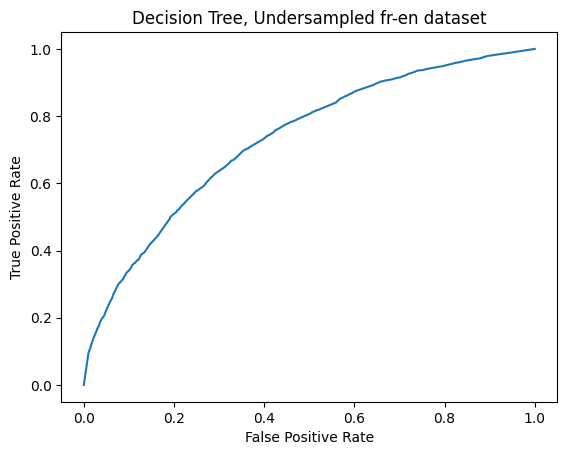

In [61]:
plt.plot(fpr_u, tpr_u)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree, Undersampled fr-en dataset')
plt.show()

In [62]:
confusion_matrix_undersampled = confusion_matrix(y_test, y_u_dt)

In [63]:
print(confusion_matrix_undersampled)

[[4971 2487]
 [1171 2386]]


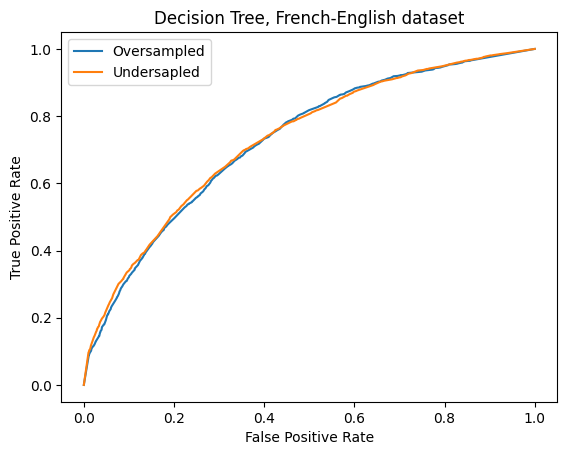

In [64]:
plt.plot(fpr_o, tpr_o, label= "Oversampled")
plt.plot(fpr_u, tpr_u, label= "Undersapled")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree, French-English dataset')
plt.show()

Gradient Boosted Decision Tree

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
parameter = {
    'n_estimators':[10, 20, 30, 40, 50],
    'max_depth':[30, 40, 50, 60],
    'max_features':['sqrt', 'log2'],
    'min_samples_split':[10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

model = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(model, param_distributions = parameter, n_iter = 50)

In [67]:
cv.fit(X_over, y_over)
cv.score(X_over, y_over)
cv.best_params_

{'n_estimators': 40,
 'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 50}

In [68]:
gbdt_o = GradientBoostingClassifier(n_estimators = 40,
                                 max_depth = 50,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 10,
                                 min_samples_split = 50
                                 )

In [69]:
gbdt_o.fit(X_over, y_over)

GradientBoostingClassifier(max_depth=50, max_features='sqrt',
                           min_samples_leaf=10, min_samples_split=50,
                           n_estimators=40)

In [70]:
y_o_gbdt = gbdt_o.predict(X_test)

In [71]:
print(classification_report(y_test, y_o_gbdt))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7458
           1       0.59      0.65      0.62      3557

    accuracy                           0.74     11015
   macro avg       0.71      0.72      0.71     11015
weighted avg       0.75      0.74      0.75     11015



In [72]:
y_prob_o = gbdt_o.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob_o)

0.8056614746638906

In [73]:
fpr_o, tpr_o, _ = roc_curve(y_test,  y_prob_o)

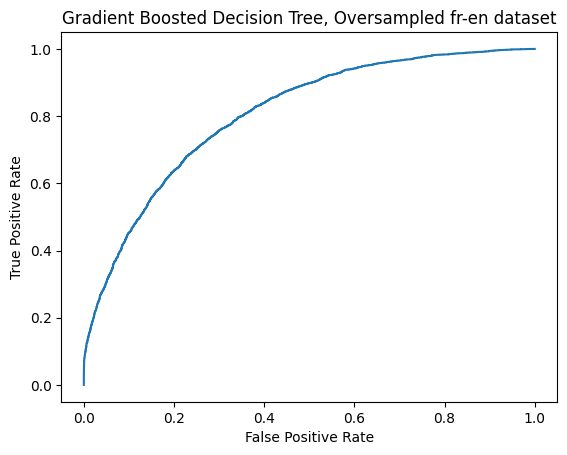

In [74]:
plt.plot(fpr_o, tpr_o)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Gradient Boosted Decision Tree, Oversampled fr-en dataset')
plt.show()

In [75]:
confusion_matrix_oversampled = confusion_matrix(y_test, y_o_gbdt)

In [76]:
print(confusion_matrix_oversampled)

[[5860 1598]
 [1231 2326]]


Gradient Boosted Decision Tree - Undersampled

In [77]:
cv.fit(X_under, y_under)
cv.score(X_under, y_under)
cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 40,
 'min_samples_leaf': 40,
 'max_features': 'sqrt',
 'max_depth': 40}

In [78]:
gbdt_u = GradientBoostingClassifier(n_estimators = 50,
                                 max_depth = 40,
                                 max_features = 'sqrt',
                                 min_samples_leaf = 40,
                                 min_samples_split = 40
                                 )

In [79]:
gbdt_u.fit(X_under, y_under)

GradientBoostingClassifier(max_depth=40, max_features='sqrt',
                           min_samples_leaf=40, min_samples_split=40,
                           n_estimators=50)

In [80]:
y_u_gbdt = gbdt_u.predict(X_test)

In [81]:
print(classification_report(y_test, y_u_gbdt))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      7458
           1       0.55      0.75      0.63      3557

    accuracy                           0.72     11015
   macro avg       0.70      0.73      0.70     11015
weighted avg       0.76      0.72      0.73     11015



In [82]:
y_prob_u = gbdt_u.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob_u)

0.8015918852254285

In [83]:
fpr_u, tpr_u, _ = roc_curve(y_test,  y_prob_u)

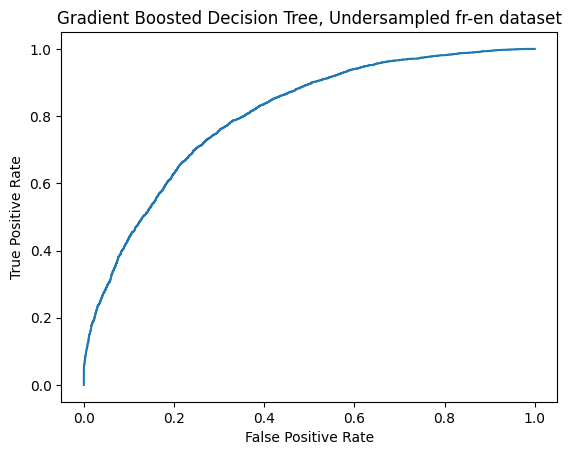

In [84]:
plt.plot(fpr_u, tpr_u)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Gradient Boosted Decision Tree, Undersampled fr-en dataset')
plt.show()

In [85]:
confusion_matrix_undersampled = confusion_matrix(y_test, y_u_gbdt)
print(confusion_matrix_undersampled)

[[5238 2220]
 [ 874 2683]]


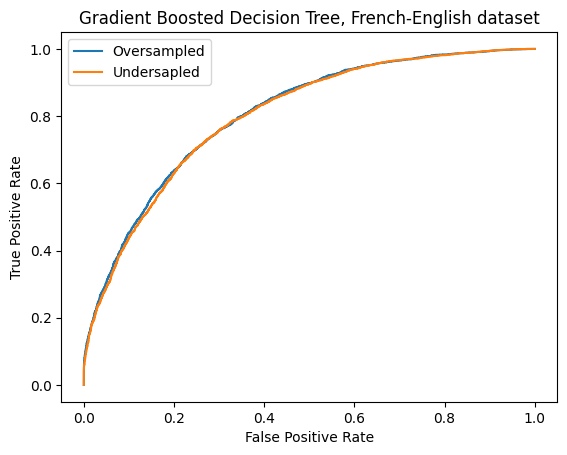

In [86]:
plt.plot(fpr_o, tpr_o, label= "Oversampled")
plt.plot(fpr_u, tpr_u, label= "Undersapled")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Gradient Boosted Decision Tree, French-English dataset')
plt.show()

Logistic Regression - oversampled

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
parameter = {
    'C':[0.01, 0.1, 1, 10, 100],
    'solver':['liblinear'],
    'max_iter':[9000],
    'penalty':['l1'],
}

model = LogisticRegression()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model, param_grid = parameter)

In [89]:
cv.fit(Xs_over, ys_over)
cv.score(Xs_over, ys_over)
cv.best_params_

{'C': 10, 'max_iter': 9000, 'penalty': 'l1', 'solver': 'liblinear'}

In [90]:
log_o = LogisticRegression(C = 10, solver = 'liblinear', penalty = 'l1', max_iter = 9000)

In [91]:
log_o.fit(Xs_over, ys_over)

LogisticRegression(C=10, max_iter=9000, penalty='l1', solver='liblinear')

In [92]:
y_o_log = log_o.predict(Xs_test)

In [93]:
print(classification_report(ys_test, y_o_log))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      7458
           1       0.49      0.67      0.56      3557

    accuracy                           0.67     11015
   macro avg       0.65      0.67      0.65     11015
weighted avg       0.71      0.67      0.68     11015



In [94]:
y_prob_o = log_o.predict_proba(Xs_test)[:, 1]
roc_auc_score(ys_test, y_prob_o)

0.708612066010291

In [95]:
fpr_o, tpr_o, _ = roc_curve(ys_test,  y_prob_o)

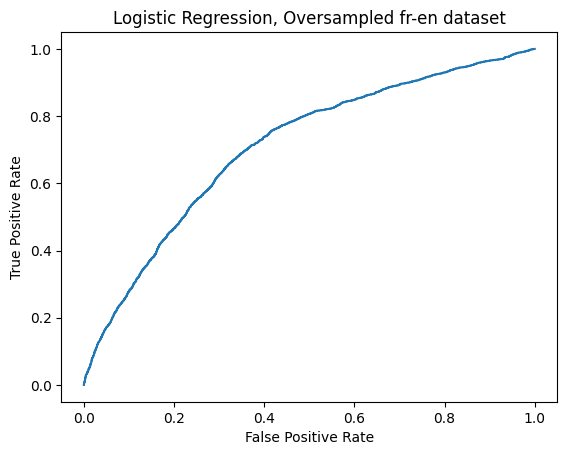

In [105]:
plt.plot(fpr_o, tpr_o)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression, Oversampled fr-en dataset')
plt.show()

In [97]:
confusion_matrix_oversampled = confusion_matrix(ys_test, y_o_log)
print(confusion_matrix_oversampled)

[[4997 2461]
 [1188 2369]]


Logistic Regression - undersampled

In [98]:
cv.fit(Xs_under, ys_under)
cv.score(Xs_under, ys_under)
cv.best_params_

{'C': 10, 'max_iter': 9000, 'penalty': 'l1', 'solver': 'liblinear'}

In [99]:
log_u = LogisticRegression(C = 10, solver = 'liblinear', penalty = 'l1', max_iter = 9000)

In [100]:
log_u.fit(Xs_under, ys_under)

LogisticRegression(C=10, max_iter=9000, penalty='l1', solver='liblinear')

In [101]:
y_u_log = log_u.predict(Xs_test)

In [102]:
print(classification_report(ys_test, y_u_log))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      7458
           1       0.49      0.67      0.56      3557

    accuracy                           0.67     11015
   macro avg       0.65      0.67      0.65     11015
weighted avg       0.71      0.67      0.68     11015



In [103]:
y_prob_u = log_u.predict_proba(Xs_test)[:, 1]
roc_auc_score(ys_test, y_prob_u)

0.7082701267855308

In [104]:
fpr_u, tpr_u, _ = roc_curve(ys_test,  y_prob_u)

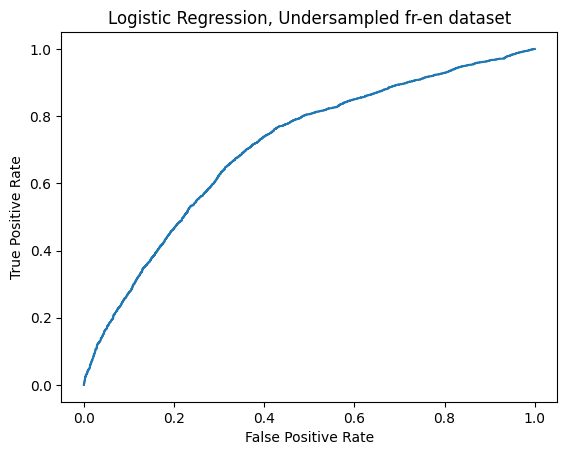

In [106]:
plt.plot(fpr_u, tpr_u)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression, Undersampled fr-en dataset')
plt.show()

In [107]:
confusion_matrix_undersampled = confusion_matrix(ys_test, y_u_log)
print(confusion_matrix_undersampled)

[[4965 2493]
 [1177 2380]]


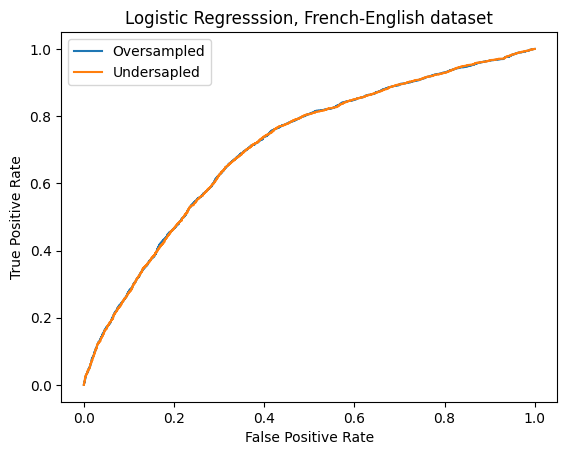

In [108]:
plt.plot(fpr_o, tpr_o, label= "Oversampled")
plt.plot(fpr_u, tpr_u, label= "Undersapled")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regresssion, French-English dataset')
plt.show()